# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Mohamad Baskoro Aji
- **Email:** baskoroaji2@gmail.com
- **ID Dicoding:** mohamad_baskoro_aji2

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak terjual dan produk apa yang paling sedikit?
- Kapan Customer Melakukan Transaksi terbanyak?
- Dimana saja sebaran pelanggan yang melakukan transaksi dan dimanakah pelanggan yang melakukan transaksi lebih banyak?
- apa saja kategori produk yang memiliki tingkat kepuasan yang tinggi dan yang rendah?
- Metode Pembayaran apa yang paling disukai oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Data Wrangling

### Gathering Data

In [4]:
dir = "./Data/"

orders = pd.read_csv(dir + "orders_dataset.csv")
customers = pd.read_csv(dir + "customers_dataset.csv")
geolocation = pd.read_csv(dir + "geolocation_dataset.csv")
order_items = pd.read_csv(dir + "order_items_dataset.csv")
order_reviews = pd.read_csv(dir + "order_reviews_dataset.csv")
products = pd.read_csv(dir + "products_dataset.csv")
product_category_name_translation = pd.read_csv(dir + "product_category_name_translation.csv")
sellers = pd.read_csv(dir + "sellers_dataset.csv")
order_payments = pd.read_csv(dir + "order_payments_dataset.csv")



In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Insight:
- Data perlu digali dan diolah di 

### Assessing Data

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [20]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [21]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [22]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**dari pencarian info diatas ada beberapa nilai non null count dan tipe data oleh karena itu dilakukan pencarian menggunakan isna()**

In [23]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [24]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Melakukan for loop untuk mencari duplikat di setiap dataset**

In [26]:
duplicated_data = {'orders': orders, 
                   'customers': customers, 
                   'geolocation': geolocation, 
                   'order_items': order_items, 
                   'order_reviews': order_reviews, 
                   'products': products, 
                   'product_category_name_translation': product_category_name_translation, 
                   'sellers': sellers, 
                   'order_payments': order_payments}
res = []
for name, df in duplicated_data.items():
    duplicate_count = df.duplicated().sum()
    res.append({'duplicated_data': name, 'duplicate_count': duplicate_count})
duplicate_counts = pd.DataFrame(res)
pd.DataFrame(duplicate_counts)

,duplicated_data,duplicate_count
0,orders,0
1,customers,0
2,geolocation,261831
3,order_items,0
4,order_reviews,0
5,products,0
6,product_category_name_translation,0
7,sellers,0
8,order_payments,0


**Melakukan describe dengan masing masing dataset**

In [27]:
print('\n Data Order \n', orders.describe(include="all"))
print('\n Data Customer \n', customers.describe(include="all"))
print('\n Data Geolocation \n', geolocation.describe(include="all"))
print('\n Data Order_items \n', order_items.describe(include="all"))
print('\n Data order_reviews \n', order_reviews.describe(include="all"))
print('\n Data products \n', products.describe(include="all"))
print('\n Data product_category_name_translation \n', product_category_name_translation.describe(include="all"))
print('\n Data sellers \n', sellers.describe(include="all"))
print('\n Data order_payments \n', order_payments.describe(include="all"))



 Data Order 
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00      

**Insight:**
- terdapat missing value, tipe data yang tidak sesuai, dan duplikasi
- harus dilakukan pembersihan data

### Cleaning Data
- harus dilakukan pembersihan data pada geolocation, orders, orders_review dan products

In [28]:
duplicates_geo = geolocation[geolocation.duplicated()]
pd.DataFrame(duplicates_geo)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


**Melakukan drop duplicates pada geolocation**

In [29]:
geolocation.drop_duplicates(inplace=True)

In [30]:
print(geolocation.duplicated().sum())
pd.DataFrame(geolocation)

0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


**Melakukan fillna dengan no comment untuk order_reviews dimana pada column review_tittle dan message kosong, juga melakukan fillna ke product_photos_qty**

In [31]:
order_reviews.fillna(value="no comment", inplace=True)

In [32]:
products["product_photos_qty"].fillna(value=0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7464\3530168474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products["product_photos_qty"].fillna(value=0, inplace=True)


**Melakukan Perubahan pada tipe data di order_items, order_reviews, dan orders datetime**

In [33]:
order_items_datetime = ["shipping_limit_date"]

for column in order_items_datetime:
  order_items[column] = pd.to_datetime(order_items[column])

In [34]:
order_reviews_datetime = ["review_creation_date","review_answer_timestamp"]

for column in order_reviews_datetime:
  order_reviews[column] = pd.to_datetime(order_reviews[column])

In [35]:
orders_datetime = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in orders_datetime:
  orders[column] = pd.to_datetime(orders[column])

In [36]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [37]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [38]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Cleaning data pada product dengan mengisi product category name dengan Other**

In [39]:
products.product_category_name.fillna(value="Other", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7464\85805223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products.product_category_name.fillna(value="Other", inplace=True)


**Insight:**
- setelah dengan banyak pertimbangan untuk membersihkan data, data data diatas yang akan di proses selanjutnya untuk EDA

## Exploratory Data Analysis (EDA)

**Melakukan EDA dari data yang sudah dibersihkan**

- **Eksplorasi pada customer & Orders**

In [40]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [41]:
customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [42]:
customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Explore data orders**

In [43]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [44]:
orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [45]:
orders[orders['order_status'] == 'shipped'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03


In [46]:
orders[orders['order_status'] == 'canceled'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17


**Membuat Delivery Time**

In [47]:
delivered_orders = orders[orders['order_status'] == 'delivered']
delivery_time = delivered_orders['order_delivered_customer_date'] - delivered_orders['order_delivered_carrier_date']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders["delivery_time"] = round(delivery_time/86400)

In [48]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


**Merge Data Customer dan Orders**

In [49]:
customer_order_df = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [50]:
customer_order_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head()

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: order_id, dtype: int64

In [51]:
customer_order_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: order_id, dtype: int64

**Eksplorasi Data Order Reviews & Payment**

In [52]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no comment,no comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no comment,no comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no comment,no comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no comment,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [53]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Merge data order review dan payment**

In [54]:
order_review_payment_df = pd.merge(
    left=order_reviews,
    right=order_payments,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_review_payment_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no comment,no comment,2018-01-18,2018-01-18 21:46:59,1.0,credit_card,8.0,397.26
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no comment,no comment,2018-03-10,2018-03-11 03:05:13,1.0,credit_card,1.0,88.09
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no comment,no comment,2018-02-17,2018-02-18 14:36:24,1.0,credit_card,1.0,194.12
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no comment,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,credit_card,1.0,222.84
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no comment,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1.0,credit_card,10.0,1333.25


In [55]:
order_review_payment_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"],
    "review_score": ["min", "max"]
})

order_id payment_value           review_score    
              nunique           min       max          min max
payment_type                                                  
boleto          19636         11.62   7274.88            1   5
credit_card     75910          0.01  13664.08            1   5
debit_card       1521         13.38   4445.50            1   5
not_defined         3          0.00      0.00            1   3
voucher          3829          0.00   3184.34            1   5

**Merge data menjadi customer clean df**

In [56]:
customers_clean_df = pd.merge(
    left=customer_order_df,
    right=order_review_payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_clean_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25


**Eksplorasi Data Order Items dan Seller**

In [57]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [58]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Merge data Seller dan Order Items**

In [59]:
seller_item_df = pd.merge(
    left=sellers,
    right=order_items,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
seller_item_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [60]:
seller_item_df.groupby(["seller_state", "seller_id"])["price"].sum().reset_index()
seller_item_df.loc[seller_item_df.groupby("seller_state")["price"].idxmax()]
seller_item_df.sort_values(by="price", ascending=False)
seller_item_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


**Eksplorasi Data Product dan Product category english**

In [61]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [62]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Merge data Product**

In [63]:
product_category_df = pd.merge(
    left=products,
    right=product_category_name_translation,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
seller_item_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


**Merge Data Seller menjadi Seller Clean**

In [64]:
seller_clean_df = pd.merge(
    left=seller_item_df,
    right=product_category_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
seller_clean_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,esporte_lazer,26.0,417.0,3.0,700.0,43.0,15.0,35.0,sports_leisure
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,esporte_lazer,27.0,485.0,2.0,600.0,35.0,15.0,28.0,sports_leisure
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,esporte_lazer,44.0,1089.0,1.0,300.0,16.0,5.0,15.0,sports_leisure
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,malas_acessorios,21.0,769.0,4.0,1600.0,55.0,37.0,30.0,luggage_accessories
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,papelaria,30.0,832.0,5.0,2000.0,25.0,55.0,40.0,stationery


In [65]:
seller_clean_df.groupby(by=["product_category_name_english", "seller_id"]).agg({
    "order_id": "nunique",
}).sort_values(by="order_id", ascending=False)

,,order_id
product_category_name_english,seller_id,
watches_gifts,6560211a19b47992c3666cc44a7e94c0,1469
bed_bath_table,4a3ca9315b744ce9f8e9374361493884,1459
garden_tools,1f50f920176fa81dab994f9023523100,1378
telephony,ea8482cd71df3c1969d7b9473ff13abc,1123
bed_bath_table,da8622b14eb17ae2831f4ac5b9dab84a,1074
...,...,...
housewares,822166ed1e47908f7cfb49946d03c726,1
consoles_games,c84592044b180dec206770c38603814b,1
housewares,87142160b41353c4e5fca2360caf6f92,1


**Merge Semua Data menjadi all_data_df**

In [66]:
all_data_df = pd.merge(
    left=customers_clean_df,
    right=seller_clean_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [67]:
all_data_df.groupby(by="product_category_name_english").agg({
    "review_score": "mean"
}).sort_values(ascending=False, by="review_score")


,review_score
product_category_name_english,
cds_dvds_musicals,4.642857
fashion_childrens_clothes,4.500000
books_general_interest,4.438503
books_imported,4.419355
flowers,4.419355
...,...
home_comfort_2,3.642857
fashion_male_clothing,3.548611
office_furniture,3.526791


In [68]:
all_data_df.groupby(by="customer_city").agg({
    "delivery_time": "mean"
}).sort_values(ascending=False, by="delivery_time")

,delivery_time
customer_city,
novo brasil,146.000000
capinzal do norte,104.500000
adhemar de barros,92.000000
santa cruz de goias,84.333333
arace,81.500000
...,...
santo antonio de goias,NaN
sao domingos do sul,NaN
sao fernando,NaN


In [69]:
all_data_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "order_id": "nunique"
}).sort_values(ascending=False, by="order_id")

order_id
customer_city product_category_name_english          
sao paulo     bed_bath_table                     1653
              health_beauty                      1533
              sports_leisure                     1266
              housewares                         1107
              computers_accessories              1004
...                                               ...
irai de minas stationery                            1
              home_appliances_2                     1
irai          housewares                            1
              computers_accessories                 1
zortea        computers_accessories                 1

[25199 rows x 1 columns]

**Insight:**
- dari exploratory data analysis diatas dapat beberapa petunjuk seperti kategori produk apa yang paling banyak, rating per produk, waktu pengiriman, data sebaran customer, dan tipe pembayaran yang customer lakukan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling banyak terjual dan produk apa yang paling sedikit?

In [70]:
sum_order_items_df = all_data_df.groupby("product_category_name_english").order_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name_english,order_id
0,bed_bath_table,11980
1,health_beauty,10029
2,sports_leisure,9002
3,furniture_decor,8827
4,computers_accessories,8150
5,housewares,7377
6,watches_gifts,6212
7,telephony,4725
8,garden_tools,4590
9,auto,4399


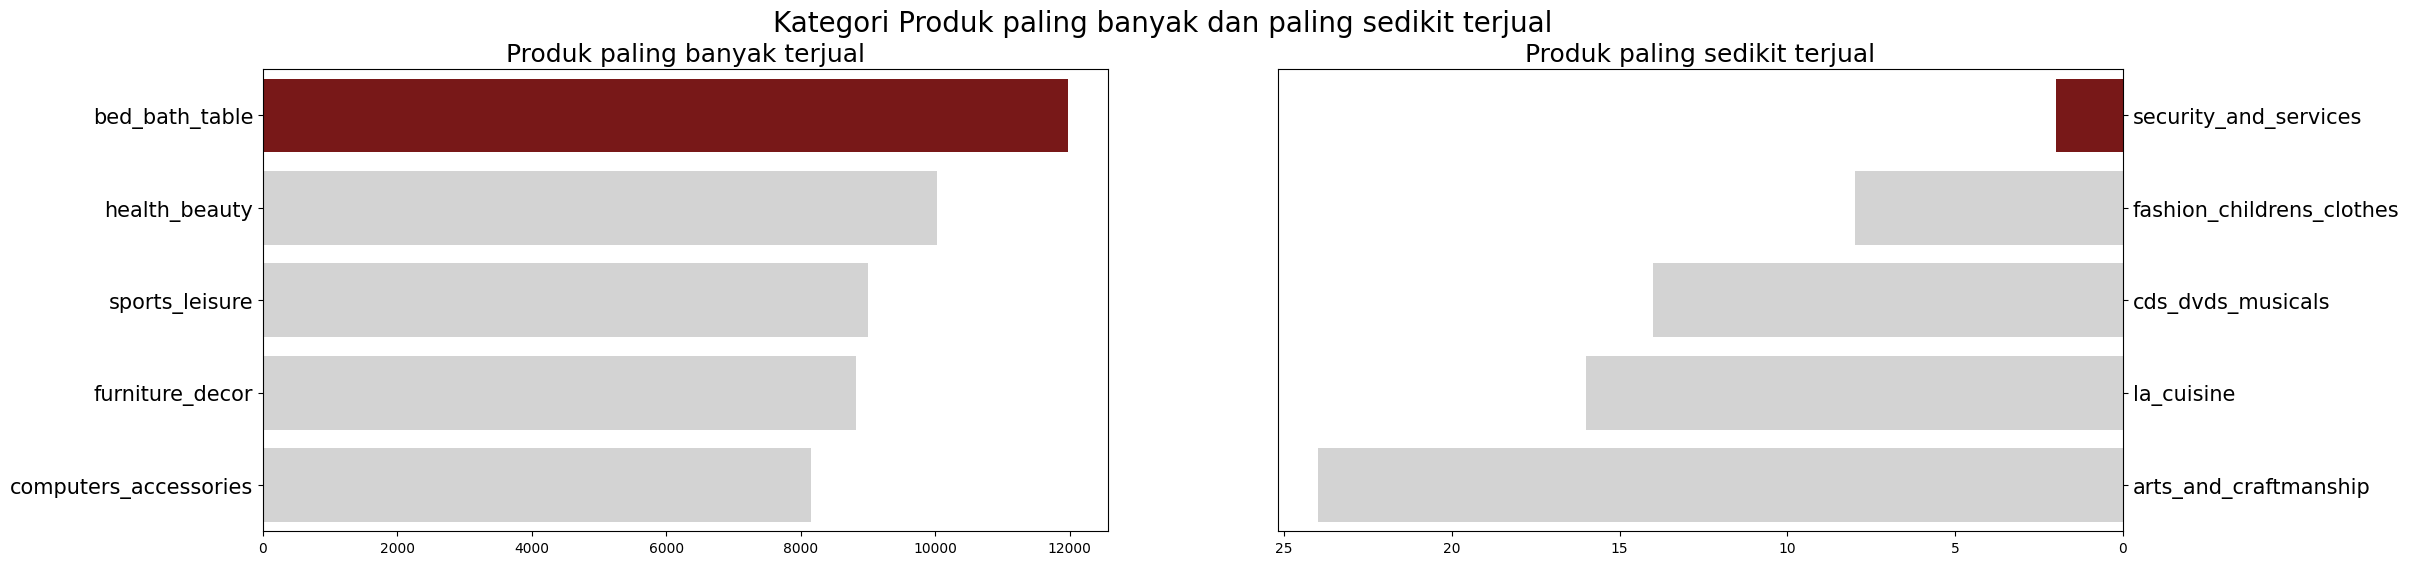

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#880808", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name_english", hue="product_category_name_english" , data=sum_order_items_df.head(5), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="order_id", y="product_category_name_english",hue="product_category_name_english", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Kategori Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

### Pertanyaan 2: Kapan Customer Melakukan Transaksi terbanyak?

In [72]:
monthly_order_df = all_data_df.resample(rule='ME', on='order_approved_at').agg({
    "order_id": "nunique",
})
monthly_order_df.index = monthly_order_df.index.strftime('%Y-%B')
monthly_order_df = monthly_order_df.reset_index()
monthly_order_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_order_df.head()

,order_approved_at,order_count
0,2016-September,1
1,2016-October,320
2,2016-November,0
3,2016-December,1
4,2017-January,760


C:\Users\user\AppData\Local\Temp\ipykernel_7464\2254854253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_from_2016['month'] = orders_from_2016['order_approved_at'].str[5:]


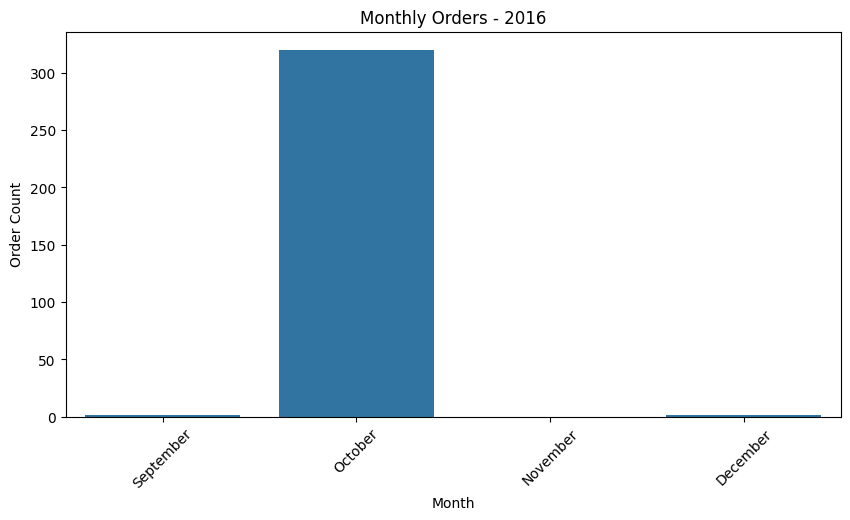

In [73]:
orders_from_2016 = monthly_order_df[monthly_order_df['order_approved_at'].str.startswith('2016')]
orders_from_2016['month'] = orders_from_2016['order_approved_at'].str[5:]

plt.figure(figsize=(10, 5))

sns.barplot(x='month', y='order_count', data=orders_from_2016, color='#1f77b4')

plt.title("Monthly Orders - 2016")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.xticks(rotation=45)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7464\1991006631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_from_2017['month'] = orders_from_2017['order_approved_at'].str[5:]


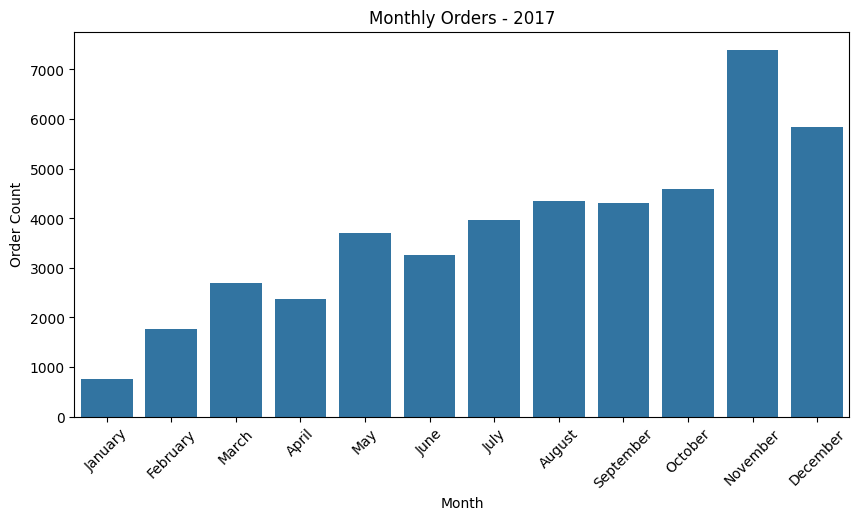

In [74]:
orders_from_2017 = monthly_order_df[monthly_order_df['order_approved_at'].str.startswith('2017')]
orders_from_2017['month'] = orders_from_2017['order_approved_at'].str[5:]

plt.figure(figsize=(10, 5))

sns.barplot(x='month', y='order_count', data=orders_from_2017, color='#1f77b4')

plt.title("Monthly Orders - 2017")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.xticks(rotation=45)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7464\1862474952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_from_2018['month'] = orders_from_2018['order_approved_at'].str[5:]


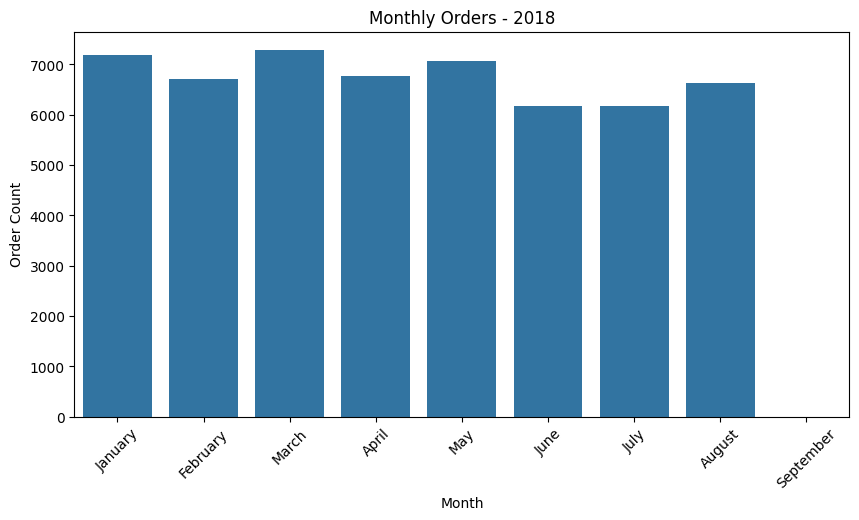

In [75]:
orders_from_2018 = monthly_order_df[monthly_order_df['order_approved_at'].str.startswith('2018')]
orders_from_2018['month'] = orders_from_2018['order_approved_at'].str[5:]

plt.figure(figsize=(10, 5))

sns.barplot(x='month', y='order_count', data=orders_from_2018, color='#1f77b4')

plt.title("Monthly Orders - 2018")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.xticks(rotation=45) 

plt.show()

In [76]:
all_order_df = all_data_df.resample(rule='ME', on='order_approved_at').agg({
    "order_id": "nunique",
})
all_order_df.index = all_order_df.index.strftime('%Y-%m')
all_order_df = all_order_df.reset_index()
all_order_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
all_order_df.head()

,order_approved_at,order_count
0,2016-09,1
1,2016-10,320
2,2016-11,0
3,2016-12,1
4,2017-01,760


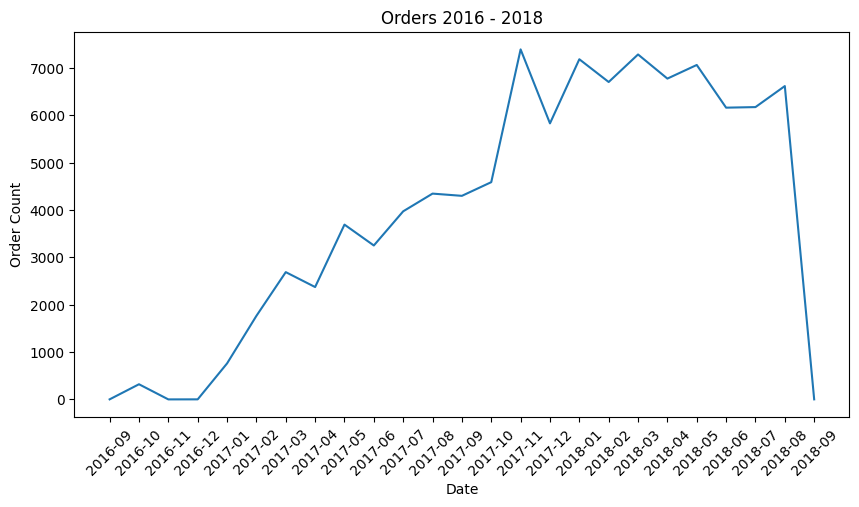

In [77]:
plt.figure(figsize=(10, 5))

sns.lineplot(x='order_approved_at', y='order_count', data=all_order_df, color='#1f77b4')

plt.title("Orders 2016 - 2018")
plt.xlabel("Date")
plt.ylabel("Order Count")
plt.xticks(rotation=45)

plt.show()

### Pertanyaan 3: Dimana saja sebaran pelanggan yang melakukan transaksi dan dimanakah pelanggan yang melakukan transaksi lebih banyak?

In [78]:
cust_state_df = all_data_df.groupby(by="customer_state").customer_id.nunique().reset_index()
cust_state_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
cust_state_df.sort_values(ascending=False ,by="customer_count").head()

,customer_state,customer_count
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


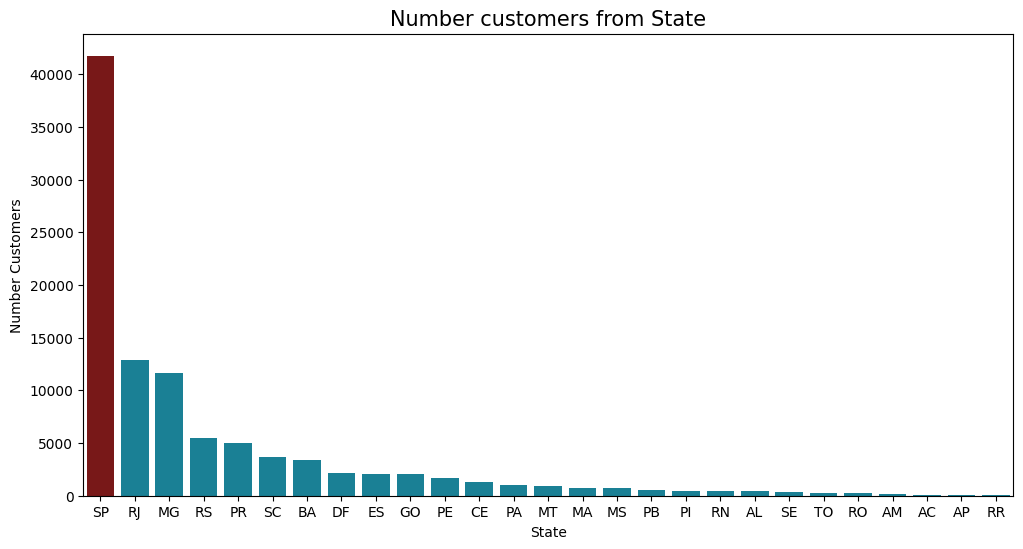

In [79]:
plt.figure(figsize=(12, 6))

most_common_state = cust_state_df.loc[cust_state_df['customer_count'].idxmax(), 'customer_state']

cust_state_df = cust_state_df.sort_values(by='customer_count', ascending=False)

sns.barplot(x='customer_state',
            y='customer_count',
            hue = "customer_state",
            data=cust_state_df,
            palette=["#880808" if state == most_common_state else "#068DA9" for state in cust_state_df['customer_state']],
            legend=False
            )

plt.title("Number customers from State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number Customers")
plt.xticks(fontsize=10)
plt.show()

### Pertanyaan 4: apa saja kategori produk yang memiliki tingkat kepuasan yang tinggi dan yang rendah?

In [80]:
rating_category_product = all_data_df.groupby(by="product_category_name_english").review_score.mean().round(1).sort_values(ascending=False).reset_index()
rating_category_product.head()

,product_category_name_english,review_score
0,cds_dvds_musicals,4.6
1,fashion_childrens_clothes,4.5
2,books_general_interest,4.4
3,costruction_tools_tools,4.4
4,books_imported,4.4


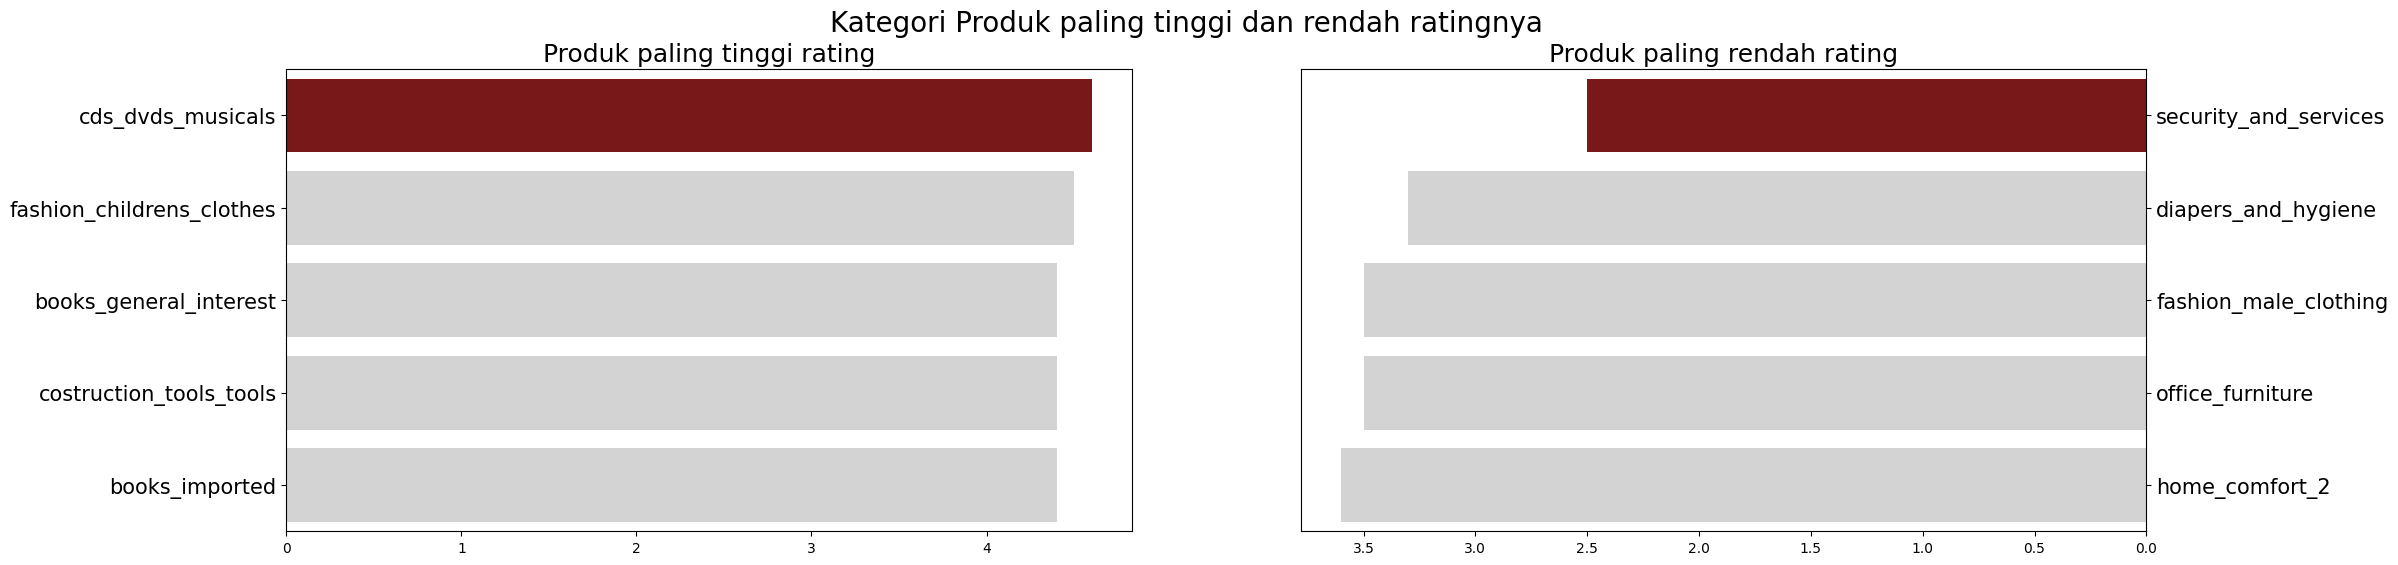

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#880808", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="review_score", y="product_category_name_english", hue="product_category_name_english" , data=rating_category_product.head(5), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling tinggi rating", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="review_score", y="product_category_name_english",hue="product_category_name_english", data=rating_category_product.sort_values(by="review_score", ascending=True).head(5), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling rendah rating", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Kategori Produk paling tinggi dan rendah ratingnya", fontsize=20)
plt.show()

### Pertanyaan 5: Metode Pembayaran apa yang paling disukai oleh pelanggan?

In [82]:
payment_method_customer = all_data_df.groupby("payment_type").order_id.nunique().sort_values(ascending=False).reset_index()
payment_method_customer.rename(columns={
    "order_id": "transaction"
}, inplace=True)
payment_method_customer.head()

,payment_type,transaction
0,credit_card,75910
1,boleto,19636
2,voucher,3829
3,debit_card,1521
4,not_defined,3


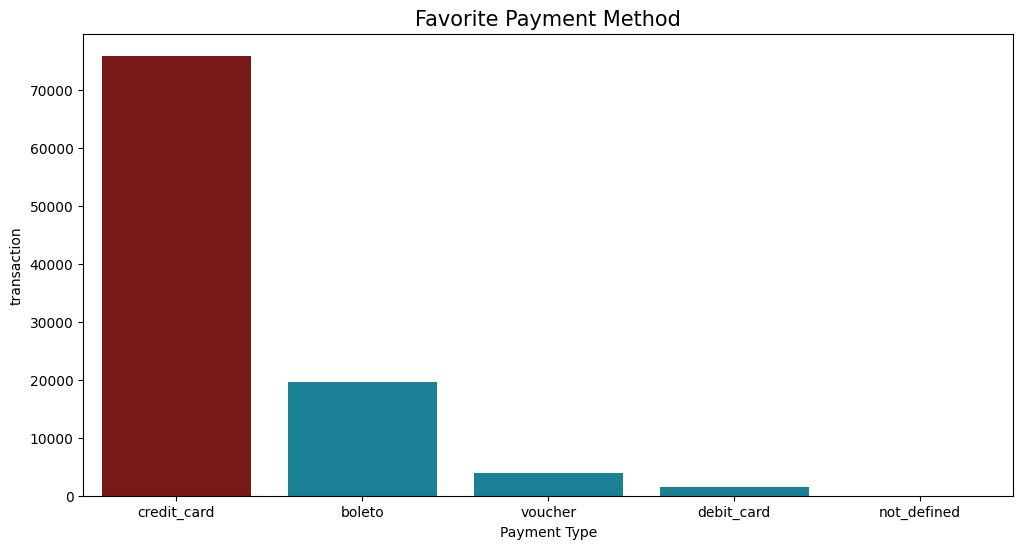

In [83]:
plt.figure(figsize=(12, 6))
most_popular_payment = payment_method_customer.iloc[0]['payment_type']

sns.barplot(x='payment_type',
            y='transaction',
            hue = "payment_type",
            data=payment_method_customer,
            palette=["#880808" if payment == most_popular_payment else "#068DA9" 
                               for payment in payment_method_customer['payment_type']],
            legend=False
            )

plt.title("Favorite Payment Method", fontsize=15)
plt.xlabel("Payment Type")
plt.ylabel("transaction")
plt.xticks(fontsize=10)
plt.show()

**Insight:**
- Dari data data tersebut terjawab lah pertanyaan pertanyaan yang ditanyakan sebelum melakukan analisis data
- dari pertanyaan pertanyaan diatas terdapat beberapa data yang menonjol seperti penggunaan credit card yang sanget tinggi, sebaran customer dan seller yang berada di sao paulo, dan produk produk yang memiliki rating tinggi dan rendah
- profit dari ecommerce tidak dimasukan karena beberapa pertimbangan, adanya seller di dalam ecommerce yang berarti ecommerce adalah pihak ketiga yang menjebatani antara seller dan customer, jika ada satu column yang menjelaskan fee dari penggunaan platform akan lebih masuk akal jika menghitung profit dari ecommerce

## Analisis Lanjutan (Opsional)

## Analisis Menggunakan RFM analysis

In [84]:
rfm_df = all_data_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", 
    "order_id": "nunique", 
    "price": "sum" 
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_data_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


C:\Users\user\AppData\Local\Temp\ipykernel_7464\1210342829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_7464\1210342829.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\user\AppData\Local\Temp\ipykernel_7464\1210342829.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

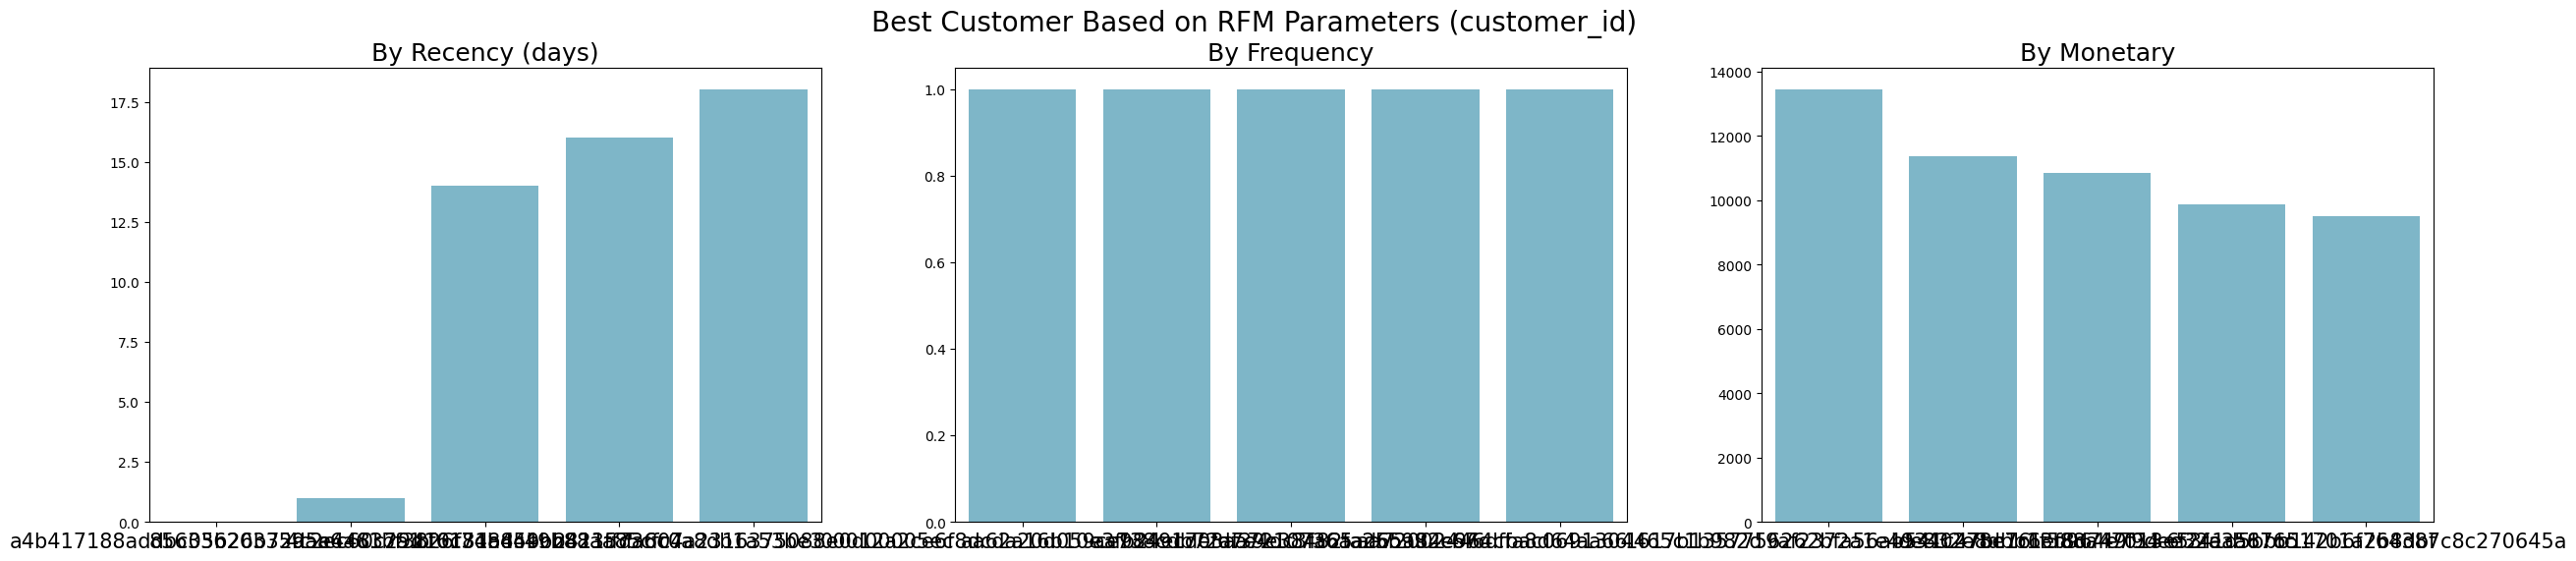

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Analisis RFM**
- dari data RFM terdapat 3 data dimana kapan terakhir kali customer melakukan transaksi, jumlah total transaksi yang dilakukan oleh customer dalam periode tertentu, dan total pengeluaran customer dalam periode tertentu.
- terdapat data recency yang menunjukan hanya ada 2 customer yang melakukan transaksi dalam 2 minggu
- jumlah total transaksi per customer dalam periode tertentu hanya 1 aja
- total pengeluaran dalam periode 2016 - 2018 yaitu berada di atas 8000

## Conclusion

- Pertanyaan 1:Kategori produk apa yang paling banyak terjual dan produk apa yang paling sedikit?
  - Pada pertanyaan ini terdapat 1 produk teratas yang paling banyak terjual yaitu bed_bath_table dan yang paling sedikit adalah security and services pada pertanyaan ini tidak disebutkan profit perusahaan ecommerce dari penjualan karena beberapa pertimbangan yaitu ecommerce memiliki seller yang berarti perusahaan merupakan pihak ketiga dalam transaksi jika ada sebuah columns yang menjelaskan adanya fee penggunaan platform maka akan lebih jelas bahwa perusahaan mengambil keuntungan sebagai pihak ketiga
- Pertanyaan 2: Kapan Customer Melakukan Transaksi terbanyak?
  - Pada pertanyaan ini data dari dataset yang diberikan memiliki rentang waktu dari 2016-2018 dan dari beberapa tahun itu ada beberapa lonjakan transaksi yaitu pada 2016 terdapat lonjakan di oktober dan pada 2017 di november kenaikan transaksi ini bisa jadi karena beberapa faktor bisa jadi persiapan menjelang akhir tahun atau adanya hari besar di wilayah tersebut karena ketika 2018 dari bulan januari hingga agustus grafik menunjukan tidak ada kenaikan transaksi yang signifikan seperti tahun sebelumnya.
- Pertanyaan 3: Dimana saja sebaran pelanggan yang melakukan transaksi dan dimanakah pelanggan yang melakukan transaksi lebih banyak?
  - pada pertanyaan ini data pada visualisasi menunjukan customer sangat banyak dari state SP itu adalah kota sao paulo dan berada di negara brazil besarnya customer dari sao paulo ini bisa jadi karena kota itu merupakan salah satu kota dengan penduduk terbanyak di dunia dan menjadi salah satu pusat keuangan di brazil yang sudah pasti penduduk disana memiliki akses ke internet dan smartphone
- Pertanyaan 4: apa saja kategori produk yang memiliki tingkat kepuasan yang tinggi dan yang rendah?
   - berbeda dengan produk yang paling banyak terjual, justru kategori produk dengan rating tertinggi ada pada cds_dvds_musicals dan rating dengan paling rendah adalah security and services. ada beberapa faktor yang mempengaruhi rating bisa dari cepatnya pengiriman, keramahan seller, seller yang responsif, dan jumlah transaksi.
- Pertanyaan 5 Metode Pembayaran apa yang paling disukai oleh pelanggan?
  - Credit card menjadi primadona di brazil terlebih dari yang kita tahu pembeli terbanyak terdapat di sao paulo yang dimana salah satu pusat ekonomi di brazil yang sudah pasti banyak penduduknya yang memiliki akses ke kartu kredit

- RFM Analysis
    - pada RFM analysis dapat ditarik kesimpulan terdapat data recency yang menunjukan hanya ada 2 customer yang melakukan transaksi dalam 2 minggu, lalu pada frekuensi ternyata setiap customer hanya melakukan sekali transaksi dari tahun 2016-2018, lalu pada monetary hanya terdapat 3 customer yang melakukan belanja diatas 8000